# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [2]:
x_treino = pd.read_csv('./csv/treino/x_treino.csv')

In [3]:
y_treino = pd.read_csv('./csv/treino/y_treino.csv')

In [4]:
x_teste = pd.read_csv('./csv/teste/x_teste.csv')

In [5]:
y_teste = pd.read_csv('./csv/teste/y_teste.csv')

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [6]:
x_treino, x_valid, y_treino,y_valid = train_test_split(x_treino,y_treino, test_size=.25)

In [7]:
y_valid.drop(columns='Unnamed: 0', axis=1, inplace=True)
y_treino.drop(columns='Unnamed: 0', axis=1, inplace=True)
x_valid.drop(columns='Unnamed: 0', axis=1, inplace=True)
x_treino.drop(columns='Unnamed: 0', axis=1, inplace=True)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [8]:
arv1 = DecisionTreeClassifier(max_depth=4, random_state=100)

In [9]:
arv1.fit(x_treino,y_treino)

DecisionTreeClassifier(max_depth=4, random_state=100)

In [10]:
arv = arv1.feature_importances_

In [11]:
x = pd.DataFrame({'features': arv}, index=x_treino.columns).sort_values(by='features', ascending=False)

In [12]:
x_treino = x_treino[['tGravityAcc-min()-X','fBodyAcc-energy()-X','tGravityAcc-mean()-Y']]

In [13]:
x_treino.reset_index(inplace=True)
y_treino.reset_index(inplace=True)

In [14]:
x_treino.drop(columns='index', axis =1 , inplace=True)
y_treino.drop(columns='index', axis =1 , inplace=True)

In [15]:
x_treino

,tGravityAcc-min()-X,fBodyAcc-energy()-X,tGravityAcc-mean()-Y
0,0.990599,-0.999855,-0.056989
1,-0.469459,-0.999806,0.686811
2,0.969795,-0.999973,-0.245309
3,0.941695,-0.305799,-0.080660
4,-0.656753,-0.999941,-0.196732
...,...,...,...
5509,0.952365,0.002250,-0.216527
5510,0.936174,-0.541297,-0.210271
5511,-0.531567,-0.999517,0.513737
5512,0.908108,-0.997913,-0.087270


In [16]:
y_treino

,0
0,4
1,6
2,5
3,3
4,6
...,...
5509,3
5510,3
5511,6
5512,4


In [17]:
x_valid = x_valid[['tGravityAcc-min()-X','fBodyAcc-energy()-X','tGravityAcc-mean()-Y']]

In [18]:
#x_valid.reset_index(inplace=True)
#y_valid.reset_index(inplace=True)

In [19]:
#x_valid.drop(columns='index', axis =1 , inplace=True)
#y_valid.drop(columns='index', axis =1 , inplace=True)

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [20]:
arv2 = DecisionTreeClassifier(max_depth=4, random_state=100)

In [21]:
path= arv2.cost_complexity_pruning_path(x_treino,y_treino)

In [22]:
ccp_alpha, impurities = path.ccp_alphas , path.impurities

In [23]:
ccp_alpha

array([0.        , 0.00112853, 0.00659951, 0.00706371, 0.04327325,
       0.07316226, 0.11009029, 0.16693389, 0.18640582])

In [24]:
arvores = []
for a in ccp_alpha:
    arvore = DecisionTreeClassifier(max_depth=4 , random_state=100, ccp_alpha=a)
    clf = arvore.fit(x_treino,y_treino)
    arvores.append(clf)

In [25]:
arvores

[DecisionTreeClassifier(max_depth=4, random_state=100),
 DecisionTreeClassifier(ccp_alpha=0.0011285315163792192, max_depth=4,
                        random_state=100),
 DecisionTreeClassifier(ccp_alpha=0.006599511928672933, max_depth=4,
                        random_state=100),
 DecisionTreeClassifier(ccp_alpha=0.00706370632471999, max_depth=4,
                        random_state=100),
 DecisionTreeClassifier(ccp_alpha=0.0432732474546883, max_depth=4,
                        random_state=100),
 DecisionTreeClassifier(ccp_alpha=0.07316225685478439, max_depth=4,
                        random_state=100),
 DecisionTreeClassifier(ccp_alpha=0.11009029221002167, max_depth=4,
                        random_state=100),
 DecisionTreeClassifier(ccp_alpha=0.16693388826668853, max_depth=4,
                        random_state=100),
 DecisionTreeClassifier(ccp_alpha=0.1864058242803751, max_depth=4,
                        random_state=100)]

In [26]:
treino = []
for clf in arvores:
    t= clf.score(x_treino,y_treino)
    treino.append(t)

In [27]:
valid = []
for clf in arvores:
    t= clf.score(x_valid,y_valid)
    valid.append(t)

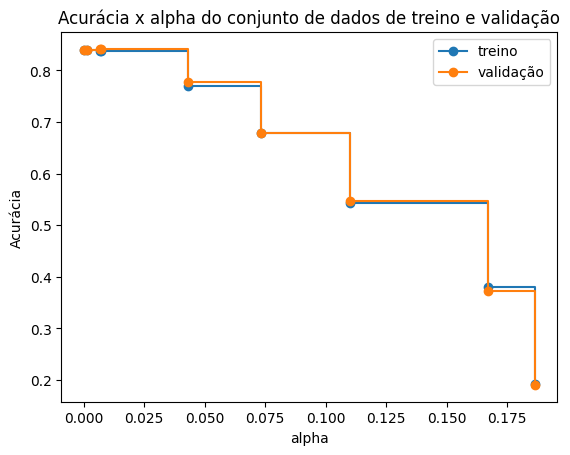

In [28]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alpha, treino, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alpha, valid, marker='o', label="validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [29]:
ind_melhor_arvore = len(valid) - valid[::-1].index(max(valid)) - 1
melhor_arvore = arvores[ind_melhor_arvore]

In [30]:
print(f'Acurácia da melhor árvore na base de validação: {valid[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 84.17


DecisionTreeClassifier(ccp_alpha=0.00706370632471999, max_depth=4,
                       random_state=100)

In [31]:
x_teste = x_teste[['tGravityAcc-min()-X','fBodyAcc-energy()-X','tGravityAcc-mean()-Y']]
y_teste.drop('Unnamed: 0', axis =1 , inplace=True)

Acurácia: 75.40


C:\Users\Usuário\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


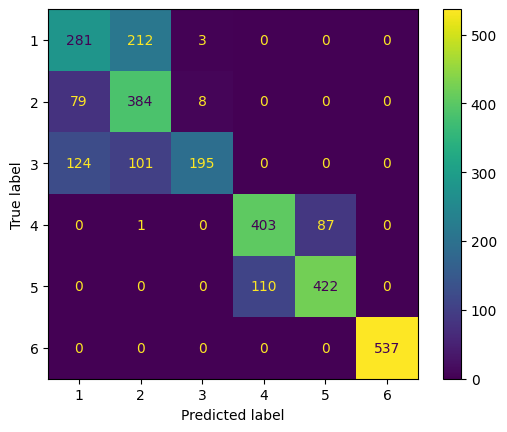

In [32]:
acuracia_teste = melhor_arvore.score(x_teste, y_teste)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(melhor_arvore, x_teste, y_teste);

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [44]:
# a Arvore saiu com uma acurácia bem melhor
# importante ressaltar que , mesmo, o teste sendo independente da base de treino
# o resultado foi satisfatório